In [3]:
!python -m spacy download en_trf_bertbaseuncased_lg

     |█▋                              | 20.8MB 13kB/s eta 8:11:402ERROR: Exception:
Traceback (most recent call last):
  File "/home/amit/anaconda3/lib/python3.7/site-packages/pip/_vendor/urllib3/contrib/pyopenssl.py", line 304, in recv_into
    return self.connection.recv_into(*args, **kwargs)
  File "/home/amit/anaconda3/lib/python3.7/site-packages/OpenSSL/SSL.py", line 1822, in recv_into
    self._raise_ssl_error(self._ssl, result)
  File "/home/amit/anaconda3/lib/python3.7/site-packages/OpenSSL/SSL.py", line 1622, in _raise_ssl_error
    raise WantReadError()
OpenSSL.SSL.WantReadError

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/amit/anaconda3/lib/python3.7/site-packages/pip/_vendor/urllib3/response.py", line 397, in _error_catcher
    yield
  File "/home/amit/anaconda3/lib/python3.7/site-packages/pip/_vendor/urllib3/response.py", line 479, in read
    data = self._fp.read(amt)
  File "/home/amit/anaconda3/li

In [8]:
from multiprocessing import Pool

In [2]:
import time

In [3]:
import concurrent.futures

In [4]:
import numpy as np

In [5]:
import spacy

In [6]:
!export MODIN_ENGINE=ray  # Modin will use Ray

In [7]:
import modin.pandas as pd

Port 8787 is already in use. 
Perhaps you already have a cluster running?
Hosting the diagnostics dashboard on a random port instead.


In [21]:
import seaborn as sns

In [9]:
nlp = spacy.load("en_trf_bertbaseuncased_lg")

In [10]:
 pd.__version__

'0.6.3'

In [11]:
data = pd.read_csv('Text_Similarity_Dataset.csv')


In [60]:
type(data)

modin.pandas.dataframe.DataFrame

In [12]:

data.head()

,Unique_ID,text1,text2
0,0,savvy searchers fail to spot ads internet sear...,newcastle 2-1 bolton kieron dyer smashed home ...
1,1,millions to miss out on the net by 2025 40% o...,nasdaq planning $100m share sale the owner of ...
2,2,young debut cut short by ginepri fifteen-year-...,ruddock backs yapp s credentials wales coach m...
3,3,diageo to buy us wine firm diageo the world s...,mci shares climb on takeover bid shares in us ...
4,4,be careful how you code a new european directi...,media gadgets get moving pocket-sized devices ...


In [13]:
def sim(both):
    a,b=both
    return nlp(a).similarity(nlp(b))

In [14]:
Sims = []

In [13]:
# %%time
# for a,b in zip(data.text1,data.text2):
#     Sims.append(nlp(a).similarity(nlp(b)))

While running the above cell it was observed that only 2 cores were being used for the execution and it took a lot of time to execute

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

In [32]:
%%time
r=[]
secs = [[t1,t2] for t1,t2 in zip(data.text1[:40],data.text2[:40])]
for x in secs:
    r.append(sim(x))

CPU times: user 3min 41s, sys: 5.57 s, total: 3min 46s
Wall time: 3min 29s


In [41]:
# %%time
# with concurrent.futures.ProcessPoolExecutor() as executor:
#     secs = [[t1,t2] for t1,t2 in zip(data.text1[:1],data.text2[:1])]
#     results = executor.map(sim, secs)

CPU times: user 639 ms, sys: 348 ms, total: 987 ms
Wall time: 9.09 s


In [21]:
%%time
try:
    start = time.time() 
    
    with Pool(4) as p:
        both = [[t1,t2] for t1,t2 in zip(data.text1,data.text2)]
        result = p.map(sim, both)
finally:
    end = time.time()
    time_taken= end - start

CPU times: user 14min 6s, sys: 4min 13s, total: 18min 20s
Wall time: 2h 58min 26s


In [22]:
time_taken

10706.493853330612

In [23]:
len(result)

4023

In [24]:
result =np.array(result)

In [25]:
np.save('bert_before_train',result)

In [26]:
np.save('time_before',np.array(time_taken))

only pool good ^ ProcessPoolExecutor

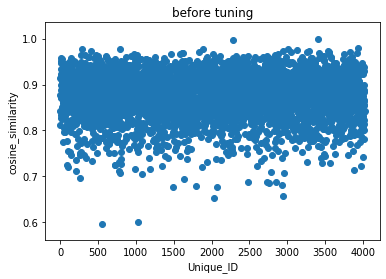

In [18]:
x = np.array(data.Unique_ID)
y = np.load('bert_before_train.npy')
plt.scatter(x,y)
plt.title("before tuning")
plt.xlabel("Unique_ID")
plt.ylabel("cosine_similarity")
plt.show()

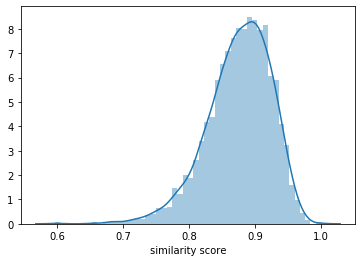

In [24]:
sns.distplot(y,axlabel='similarity score')

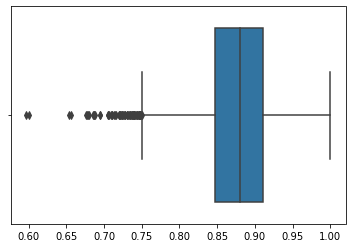

In [82]:
ax = sns.boxplot(x=y)

In [83]:
np.median(y)

0.8805089693085061

(0.8, 1)

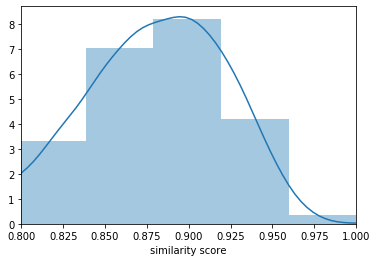

In [33]:
sns.distplot(y,axlabel='similarity score', bins = 10, label='distribution of similarity scores')
plt.xlim(0.8, 1)

In [19]:
apis = np.load('paralleldots.npy')

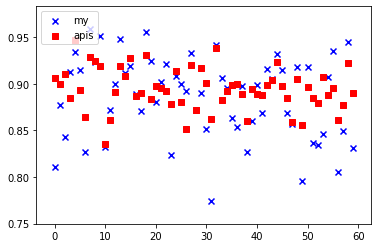

In [20]:
plt.scatter(x[:60],y[:60], c='b', marker='x', label='my')
plt.scatter(x[:60], apis[:60], c='r', marker='s', label='apis')
plt.legend(loc='upper left')
plt.show()

([array([ 1.,  3.,  3.,  6.,  6.,  7.,  9., 13.,  6.,  6.]),
  array([ 0.,  0.,  0.,  1.,  8.,  7., 25., 11.,  7.,  1.])],
 array([0.77423839, 0.79269466, 0.81115093, 0.82960721, 0.84806348,
        0.86651975, 0.88497602, 0.9034323 , 0.92188857, 0.94034484,
        0.95880111]),
 <a list of 2 Lists of Patches objects>)

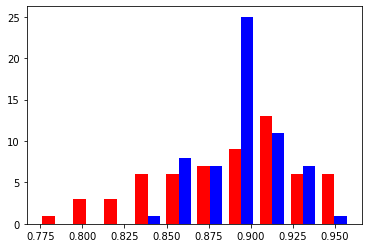

In [34]:
plt.hist([y[:60], apis[:60]], color=['r','b'])

In [91]:
data.text1[1]

'millions to miss out on the net by 2025  40% of the uk s population will still be without internet access at home  says a study.  around 23 million britons will miss out on a wide range of essential services such as education and medical information  predicts the report by telecoms giant bt. it compares to 27 million  or 50%  of the uk  who are not currently online. the idea that the digital divide will evaporate with time is  wishful thinking   the report concludes.  the study calls on the government and telecoms industry to come up with new ways to lure those that have been bypassed by the digital revolution. although the percentage of britons without home access will have fallen slightly  those that remain digital refuseniks will miss out on more  the report suggests. as more and more everyday tasks move online and offline services become less comprehensive  the divide will become more obvious and more burdensome for those that have not got net access  it predicts.  the gap between

In [92]:
data.text2[1]

'nasdaq planning $100m share sale the owner of the technology-dominated nasdaq stock index plans to sell shares to the public and list itself on the market it operates.  according to a registration document filed with the securities and exchange commission  nasdaq stock market plans to raise $100m (£52m) from the sale. some observers see this as another step closer to a full public listing. however nasdaq  an icon of the 1990s technology boom  recently poured cold water on those suggestions.  the company first sold shares in private placements during 2000 and 2001. it technically went public in 2002 when the stock started trading on the otc bulletin board  which lists equities that trade only occasionally. nasdaq will not make money from the sale  only investors who bought shares in the private placings  the filing documents said. the nasdaq is made up shares in technology firms and other companies with high growth potential. it was the most potent symbol of the 1990s internet and tele

In [93]:
y[1]

0.877268732185598

data.text1[1] and data.text2[1] are not similar their score 0.877, so our final score should be more than that

In [106]:
len([i for i in y if i>0.89])/len(y)

0.42157593835446183

In [86]:
2026/len(y)

0.503604275416356

In [102]:
data.text1[5]

'india seeks to boost construction india has cleared a proposal allowing up to 100% foreign direct investment in its construction sector.  kamal nath  commerce and industry minister  announced the decision in delhi on thursday following a cabinet meeting. analysts say improving india s infrastructure will boost foreign investment in other sectors too. the indian government s decision has spread good cheer in the construction sector  according to some indian firms.  a spokesman for dlf builders  dr vancheshwar  told the bbc this will mean  better offerings  for consumers as well as builders. he said the firm will benefit from world class  strategic partnerships  design expertise and technology  while consumers will have better choice.   the government proposal states that foreign investment of up to 100% will be allowed on the  automatic route  in the construction sector  on projects including housing  hotels  resorts  hospitals and educational establishments. the automatic route means 

In [103]:
data.text2[5]

'music mogul fuller sells company pop idol supremo simon fuller has sold his 19 entertainment company to an us entrepreneur in a $156m (£81.5m) deal.  robert sillerman s sports entertainment enterprises  which is to be renamed cfx  recently also bought an 85% share in the estate of elvis presley. mr fuller has been appointed to the cfx board and will plan and implement the company s creative strategy. the 19 firm handles a roster of music artists  tv shows and pr strategies for stars including the beckhams. the deal sees mr fuller receive £64.5m in cash and about 1.9 million shares in sports entertainment. there will also be a further £19.2m in either cash or stocks by the end of the financial year in june. mr fuller has signed a long-term agreement with the company which will see him continue to expand and develop entertainment brands. he said:  this is a hugely exciting new partnership for myself and 19 entertainment.   ckx will provide 19 with a powerful platform for global growth a

In [104]:
y[5]

0.9149988100464498

Lets pick the threshold for similarity for as 0.89

In [109]:
Similarity_Score = np.array([i for i in y if i>=0.89])

In [111]:
len(Similarity_Score)

1696

In [112]:
1696/4023

0.42157593835446183

In [115]:
int(True)

1

In [119]:
Similarity_Score = np.array([1 if i>0.89 else 0 for i in y])

In [121]:
sum(Similarity_Score)

1696

In [120]:
Similarity_Score

array([0, 0, 0, ..., 1, 0, 0])

In [122]:
dict_ = {'Unique_ID':x, 'Similarity_Score':Similarity_Score}
df=pd.DataFrame(dict_)
df.to_csv('Sumbission.csv') 

In [124]:
dict_ = {'Unique_ID':x, 'Cosine_Similarity':y, 'Similarity_Score':Similarity_Score}
df=pd.DataFrame(dict_)
df.to_csv('Sumbission_cosine_sim.csv') 